In [ ]:
from IPython.display import Image
Image(url='https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png', width=500)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xg
from sklearn.model_selection import train_test_split

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [ ]:
#load and make the copy of Iris dataset to keep track of changes.
df = pd.read_csv('Iris.csv') #read comma seperated values
df_copy=df.copy() #copy dataset

In [ ]:
df_copy

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df_copy.drop(columns=['Id'],axis=0,inplace=True)

In [ ]:
df_copy.dtypes

,0
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [ ]:
df_copy.shape
print('Rows ---->',df.shape[0])
print('Columns ---->',df.shape[1])

Rows ----> 150
Columns ----> 6


In [ ]:
df_copy.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df_copy.size

750

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df_copy.columns = ['sl','sw','pl','pw','species']
df_split_iris=df_copy.species.str.split('-',n=-1,expand=True) #Remove prefix 'Iris-' from species col
df_split_iris.drop(columns=0,axis=1,inplace=True)#Drop 'Iris-' col
df_split_iris

,1
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [ ]:
df3_full=df_copy.join(df_split_iris)
df3_full

,sl,sw,pl,pw,species,1
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,virginica


In [ ]:
df3_full.rename({1:'species1'},axis=1,inplace=True) #Rename column
df3_full

,sl,sw,pl,pw,species,species1
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,virginica


In [ ]:
df3_full.drop(columns='species',axis=1,inplace=True)

In [ ]:
df3_full

,sl,sw,pl,pw,species1
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df3_full.shape

(150, 5)

In [ ]:
df3_full.isna()

,sl,sw,pl,pw,species1
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [ ]:
df3_full.isna().sum()

,0
sl,0
sw,0
pl,0
pw,0
species1,0


In [ ]:
df3_full.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df3_full.species1.value_counts()

,count
species1,
setosa,50
versicolor,50
virginica,50


UnboundLocalError: local variable 'boxprops' referenced before assignment

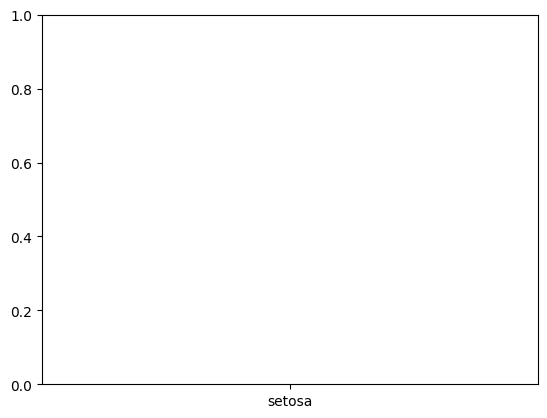

In [ ]:
sns.boxplot(x=df3_full.species1,y=df3_full.sl,data=df3_full,hue=df3_full.species1,hue_order=[0,1,2])


UnboundLocalError: local variable 'boxprops' referenced before assignment

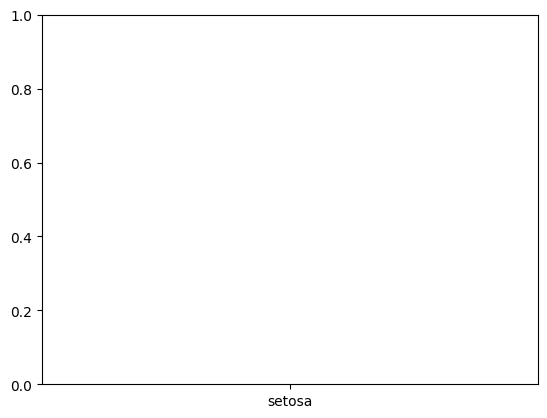

In [ ]:
sns.boxplot(x=df3_full.species1,y=df3_full.sw,data=df3_full,hue=df3_full.species1,hue_order=[0,1,2])


UnboundLocalError: local variable 'boxprops' referenced before assignment

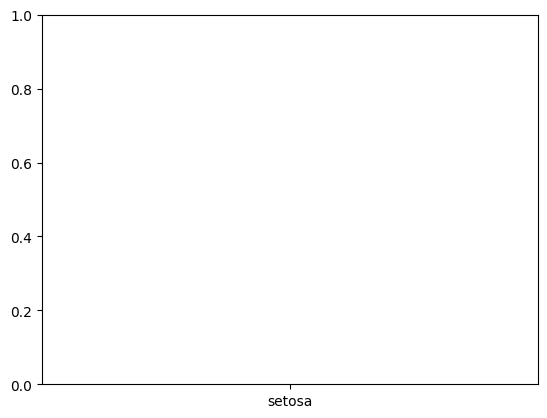

In [ ]:
sns.boxplot(x=df3_full.species1,y=df3_full.pl,data=df3_full,hue=df3_full.species1,hue_order=[0,1,2])


UnboundLocalError: local variable 'boxprops' referenced before assignment

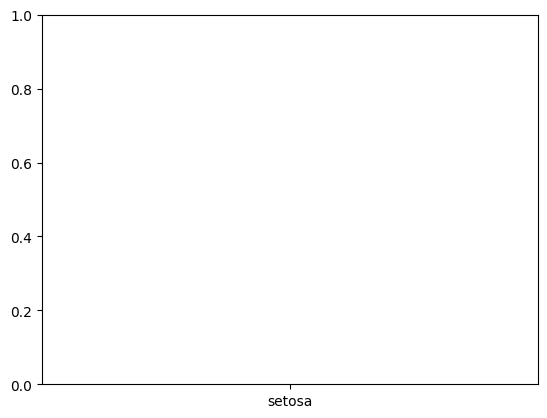

In [ ]:
sns.boxplot(x=df3_full.species1,y=df3_full.pw,data=df3_full,hue=df3_full.species1,hue_order=[0,1,2])


<Axes: xlabel='sl', ylabel='pl'>

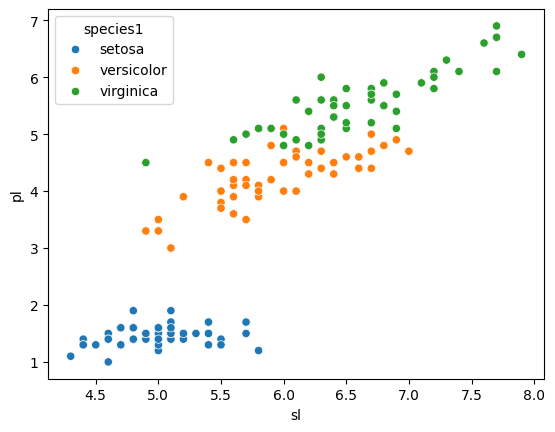

In [ ]:
sns.scatterplot(x=df3_full.sl,y=df3_full.pl,hue=df3_full.species1)


<Axes: xlabel='pl', ylabel='pw'>

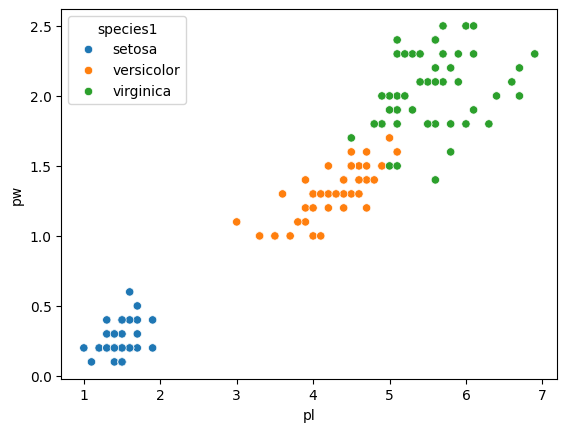

In [ ]:
sns.scatterplot(x=df3_full.pl,y=df3_full.pw,hue=df3_full.species1)


<Axes: xlabel='sl', ylabel='pw'>

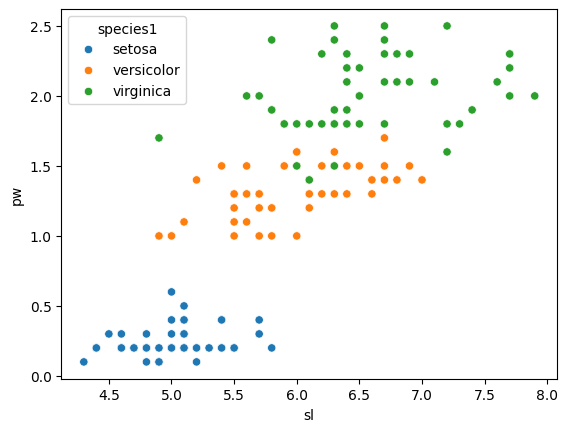

In [ ]:
sns.scatterplot(x=df3_full.sl,y=df3_full.pw,hue=df3_full.species1)


<Axes: xlabel='sw', ylabel='pl'>

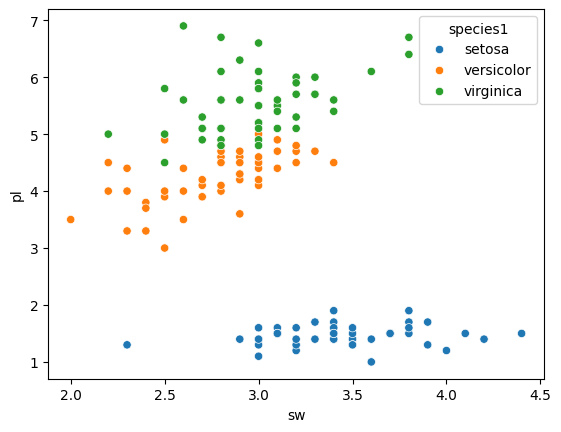

In [ ]:
sns.scatterplot(x=df3_full.sw,y=df3_full.pl,hue=df3_full.species1)


In [ ]:
df3_full.columns # check column names


Index(['sl', 'sw', 'pl', 'pw', 'species1'], dtype='object')

<ipython-input-40-201e00e1f558>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_full.pl)


<Axes: xlabel='pl', ylabel='Density'>

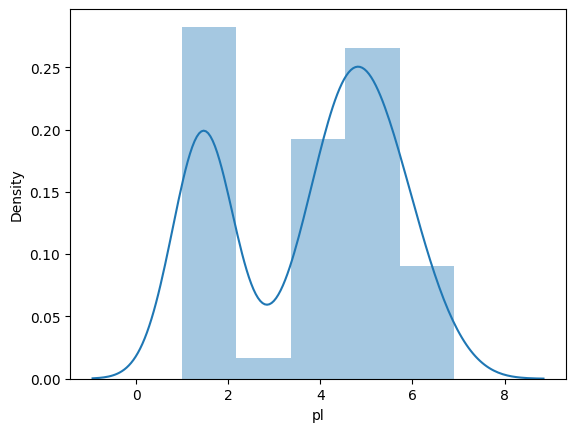

In [ ]:
sns.distplot(df3_full.pl)


<ipython-input-41-38c844479287>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_full.sl)


<Axes: xlabel='sl', ylabel='Density'>

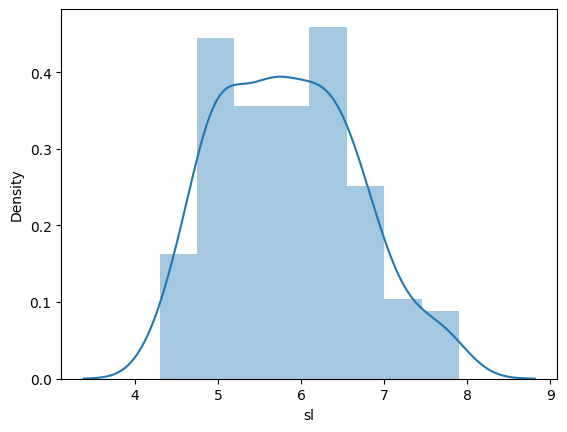

In [ ]:
sns.distplot(df3_full.sl)


<ipython-input-42-8390f5d4cf4b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_full.sw)


<Axes: xlabel='sw', ylabel='Density'>

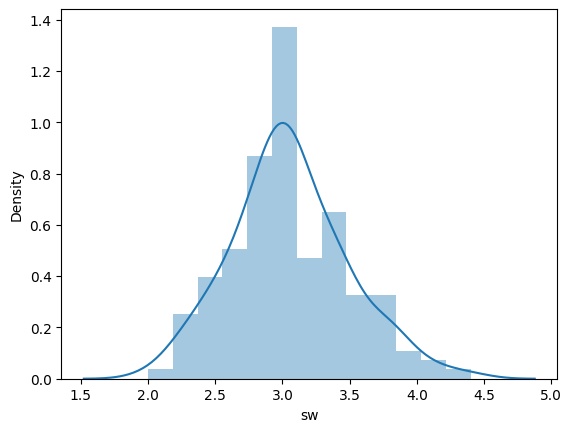

In [ ]:
sns.distplot(df3_full.sw)


<ipython-input-43-4c6ab44689b9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_full.pw)


<Axes: xlabel='pw', ylabel='Density'>

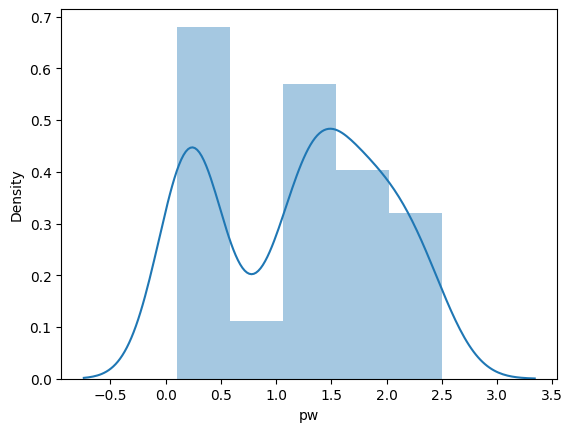

In [ ]:
sns.distplot(df3_full.pw)


<Axes: xlabel='species1', ylabel='sw'>

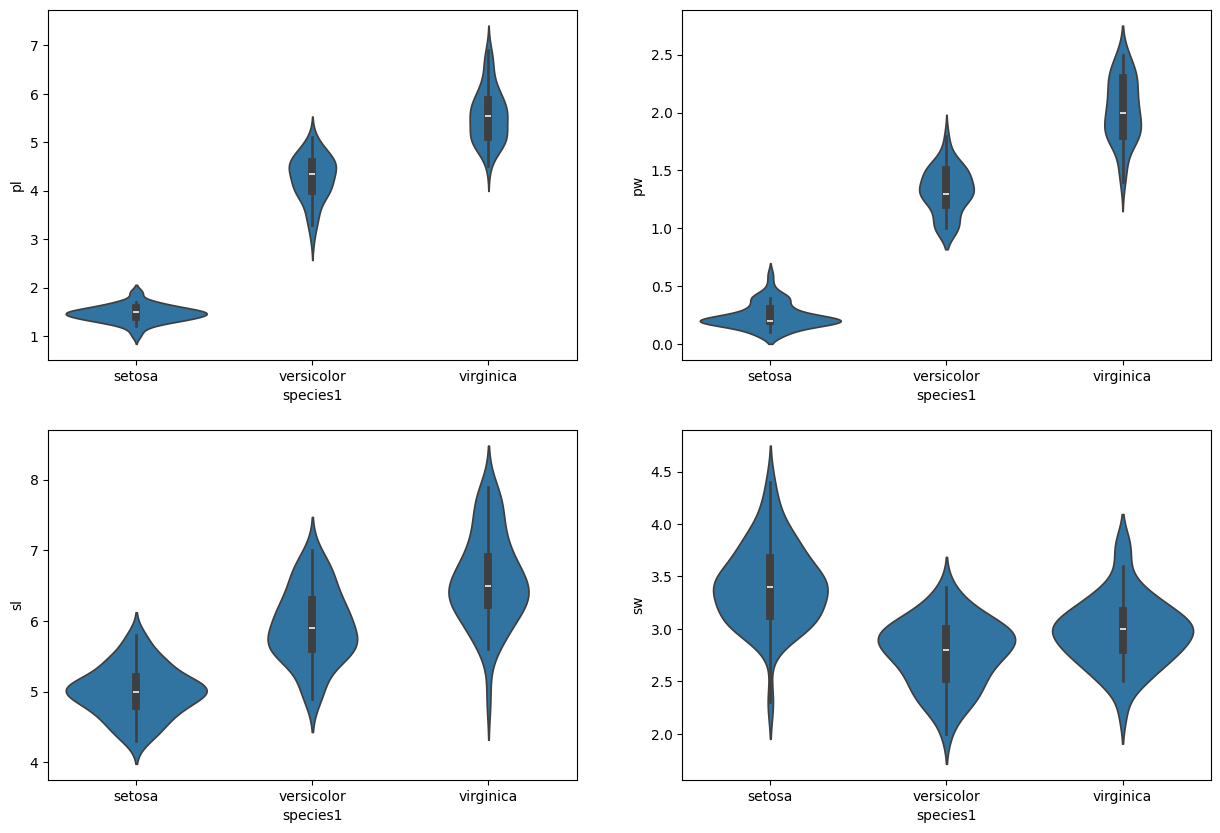

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species1',y='pl',data=df3_full)
plt.subplot(2,2,2)
sns.violinplot(x='species1',y='pw',data=df3_full)
plt.subplot(2,2,3)
sns.violinplot(x='species1',y='sl',data=df3_full)
plt.subplot(2,2,4)
sns.violinplot(x='species1',y='sw',data=df3_full)

In [ ]:
plt.figure(figsize=(7,4))
sns.heatmap(df3_full.corr(),annot=True,cmap='cubehelix_r')
plt.show()

ValueError: could not convert string to float: 'setosa'

<Figure size 700x400 with 0 Axes>

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
le.fit_transform(df3_full['species1'])
df3_full['species1']=le.fit_transform(df3_full['species1'])
df3_full

,sl,sw,pl,pw,species1
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df3_full


,sl,sw,pl,pw,species1
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
x = df3_full.iloc[:,:-1]
x

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y = df3_full.iloc[:,-1]
y

,species1
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
df3_full.species1.unique()

array([0, 1, 2])

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=20)

In [ ]:
xtrain.shape


(105, 4)

In [ ]:
ytrain.shape


(105,)

In [ ]:
xtest.shape


(45, 4)

In [ ]:
ytest.shape


(45,)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
logi = LogisticRegression()
logi.fit(xtrain,ytrain)
logi_prediction = logi.predict(xtest)
logi_prediction

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 0, 1,
       1])

In [ ]:
print(logi.score(xtrain,ytrain)*100)
print(logi.score(xtest,ytest)*100)

97.14285714285714
93.33333333333333


In [ ]:
accuracy_score(ytest,logi_prediction)*100


93.33333333333333

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
para = {'penalty':['l1','l2','elasticnet'],
        'C':[1,2,3,4,5,6,10,20,30,40,50,1.5,2.3,1.6,1.9],
        'max_iter':[100,200,300,50,70,60,50]
        }

In [ ]:
classifier_logistic = GridSearchCV(logi,param_grid = para,scoring='accuracy',cv=5)


In [ ]:
classifier_logistic.fit(xtrain,ytrain)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50, 1.5, 2.3,
                               1.6, 1.9],
                         'max_iter': [100, 200, 300, 50, 70, 60, 50],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [ ]:
classifier_logistic.best_estimator_


LogisticRegression(C=20, max_iter=50)

In [ ]:
classifier_logistic.best_params_


{'C': 20, 'max_iter': 50, 'penalty': 'l2'}

In [ ]:
classifier_logistic.best_score_


0.9714285714285715

In [ ]:
prediction = classifier_logistic.predict(xtest)
prediction

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1,
       1])

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
grid_logi_accuracy_score1 = accuracy_score(ytest,prediction)
grid_logi_accuracy_score1=(np.round(grid_logi_accuracy_score1*100))
grid_logi_accuracy_score1

91.0

In [ ]:
confusion_matrix(ytest,prediction)


array([[13,  0,  0],
       [ 0, 18,  0],
       [ 0,  4, 10]])

In [ ]:
class_pre_rec = classification_report(ytest,prediction)
print(class_pre_rec)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.82      1.00      0.90        18
           2       1.00      0.71      0.83        14

    accuracy                           0.91        45
   macro avg       0.94      0.90      0.91        45
weighted avg       0.93      0.91      0.91        45



In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
tree_classifier = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=1,
    random_state=1,
    max_leaf_nodes=2,
    class_weight='balanced',
    ccp_alpha=0.01,)

In [ ]:
tree_classifier.fit(xtrain,ytrain)


DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced', max_depth=5,
                       max_features=1, max_leaf_nodes=2, random_state=1)

In [ ]:
tree_classifier.score(xtrain,ytrain)


0.6571428571428571

In [ ]:
tree_classifier.score(xtest,ytest)


0.6888888888888889

In [ ]:
tree_classifier.predict(xtest)


array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1])

In [ ]:
tree_pred=tree_classifier.predict(xtest)


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report


In [ ]:
confusion_matrix(ytest,tree_pred)


array([[13,  0,  0],
       [ 0, 18,  0],
       [ 0, 14,  0]])

In [ ]:
print(classification_report(ytest,tree_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.56      1.00      0.72        18
           2       0.00      0.00      0.00        14

    accuracy                           0.69        45
   macro avg       0.52      0.67      0.57        45
weighted avg       0.51      0.69      0.58        45



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import sklearn


In [ ]:
sklearn.metrics.get_scorer_names()


['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_max_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 're

In [ ]:
param_dict = {"criterion":['gini','entropy'],"max_depth":[1,2,3,4,5,6,7,None]}


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
grid = GridSearchCV(tree_classifier,param_grid=param_dict,n_jobs=-1)
grid

GridSearchCV(estimator=DecisionTreeClassifier(ccp_alpha=0.01,
                                              class_weight='balanced',
                                              max_depth=5, max_features=1,
                                              max_leaf_nodes=2,
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [ ]:
grid.fit(xtrain,ytrain)


GridSearchCV(estimator=DecisionTreeClassifier(ccp_alpha=0.01,
                                              class_weight='balanced',
                                              max_depth=5, max_features=1,
                                              max_leaf_nodes=2,
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [ ]:
grid.best_params_


{'criterion': 'gini', 'max_depth': 1}

In [ ]:
grid.best_score_


0.6761904761904761

In [ ]:
grid_pred2=grid.predict(xtest)


In [ ]:
accuracy_score(ytest,grid_pred2)*100


68.88888888888889

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report


In [ ]:
confusion_matrix(ytest,grid_pred2)


array([[13,  0,  0],
       [ 0, 18,  0],
       [ 0, 14,  0]])

In [ ]:
print(classification_report(ytest,grid_pred2))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.56      1.00      0.72        18
           2       0.00      0.00      0.00        14

    accuracy                           0.69        45
   macro avg       0.52      0.67      0.57        45
weighted avg       0.51      0.69      0.58        45



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5,
    weights='uniform',
    algorithm='kd_tree',
    leaf_size=30,
    p=2,
    metric='minkowski',
    n_jobs=-1)

In [ ]:
knn.fit(xtrain,ytrain)


KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1)

In [ ]:
knn.score(xtrain,ytrain)



0.9809523809523809

In [ ]:
knn.score(xtest,ytest)


0.9555555555555556

In [ ]:
knn_pred=knn.predict(xtest)


In [ ]:
accuracy_score(ytest,knn_pred)


0.9555555555555556

In [ ]:
confusion_matrix(ytest,knn_pred)


array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 13]])

In [ ]:
accuracy_score(ytest,knn_pred)


0.9555555555555556

In [ ]:
print(classification_report(ytest,knn_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        18
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
RFC=RandomForestClassifier(n_estimators=300,criterion='gini',
    max_depth=17,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_leaf_nodes=2,
    min_impurity_decrease=0.1,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=1,
    ccp_alpha=0.01,
    max_samples=3)

In [ ]:
RFC.fit(xtrain,ytrain)


RandomForestClassifier(ccp_alpha=0.01, max_depth=17, max_leaf_nodes=2,
                       max_samples=3, min_impurity_decrease=0.1,
                       n_estimators=300, n_jobs=-1, random_state=1)

In [ ]:
RFC.score(xtrain,ytrain)


0.9333333333333333

In [ ]:
RFC.score(xtest,ytest)


0.7777777777777778

In [ ]:
RFC.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 17,
 'max_features': 'sqrt',
 'max_leaf_nodes': 2,
 'max_samples': 3,
 'min_impurity_decrease': 0.1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 300,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
RFC_pred = RFC.predict(xtest)


In [ ]:
accuracy_score(ytest,RFC_pred)


0.7777777777777778

In [ ]:
confusion_matrix(ytest,RFC_pred)


array([[13,  0,  0],
       [ 0, 10,  8],
       [ 0,  2, 12]])

In [ ]:
print(classification_report(ytest,RFC_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.83      0.56      0.67        18
           2       0.60      0.86      0.71        14

    accuracy                           0.78        45
   macro avg       0.81      0.80      0.79        45
weighted avg       0.81      0.78      0.78        45



In [ ]:
import xgboost as xg


In [ ]:
xg_model = xg.XGBClassifier(gamma=0.01,
              learning_rate=0.01, max_bin=4,
              max_depth=15,
              max_leaves=2, min_child_weight=2,n_estimators=300, n_jobs=-1,objective='multi:softprob',
             random_state=1)

In [ ]:
xg_model.fit(xtrain,ytrain)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.01, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=4,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=2,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
xg_model.score(xtrain,ytrain)


0.9714285714285714

In [ ]:
xg_model.score(xtest,ytest)


0.8222222222222222

In [ ]:
xg_pred =xg_model.predict(xtest)


In [ ]:
accuracy_score(ytest,xg_pred)


0.8222222222222222

In [ ]:
confusion_matrix(ytest,xg_pred)


array([[13,  0,  0],
       [ 3, 15,  0],
       [ 0,  5,  9]])

In [ ]:
print(classification_report(ytest,xg_pred))


              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       0.75      0.83      0.79        18
           2       1.00      0.64      0.78        14

    accuracy                           0.82        45
   macro avg       0.85      0.83      0.82        45
weighted avg       0.85      0.82      0.82        45

